In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import math
import random

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import datetime as dt
import os
# from pandas._testing import assert_frame_equal

In [7]:
kfolds = 5

saved_model_dir = "saved_model/corss_val/general_model/hp_seq_len/"
if not os.path.exists(saved_model_dir):
    os.makedirs(saved_model_dir)

saving_dir = "cross_validation/general_model/hp_seq_len/"
if not os.path.exists(saving_dir):
    os.makedirs(saving_dir)

# fix random seed for reproducibility
np.random.seed(7)

NUM_LAYERS = 1
HIDDEN_SIZE = 64
TRAIN_EPOCHS = 300

print_iter = 50
TRAIN_BATCHES = 2048

In [8]:
seq_lengths_to_evaluate = [2,3,4,5,6,7,8,9,10,11,12]

saving_dirs = []
for s in seq_lengths_to_evaluate:
    cur_saving_dir = os.path.join(saving_dir, str(s))
    print(cur_saving_dir)
    saving_dirs.append(cur_saving_dir)
    if not os.path.exists(cur_saving_dir):
        os.makedirs(cur_saving_dir)

cross_validation/general_model/hp_seq_len/2
cross_validation/general_model/hp_seq_len/3
cross_validation/general_model/hp_seq_len/4
cross_validation/general_model/hp_seq_len/5
cross_validation/general_model/hp_seq_len/6
cross_validation/general_model/hp_seq_len/7
cross_validation/general_model/hp_seq_len/8
cross_validation/general_model/hp_seq_len/9
cross_validation/general_model/hp_seq_len/10
cross_validation/general_model/hp_seq_len/11
cross_validation/general_model/hp_seq_len/12


In [9]:
saving_dirs

['cross_validation/general_model/hp_seq_len/2',
 'cross_validation/general_model/hp_seq_len/3',
 'cross_validation/general_model/hp_seq_len/4',
 'cross_validation/general_model/hp_seq_len/5',
 'cross_validation/general_model/hp_seq_len/6',
 'cross_validation/general_model/hp_seq_len/7',
 'cross_validation/general_model/hp_seq_len/8',
 'cross_validation/general_model/hp_seq_len/9',
 'cross_validation/general_model/hp_seq_len/10',
 'cross_validation/general_model/hp_seq_len/11',
 'cross_validation/general_model/hp_seq_len/12']

# results from py script

In [87]:
# Train results for seq=2 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/2\\fold0/----average train accuracy:0.69743776---- highest train accuracy:0.70319057',
#  'saved_model/corss_val/general_model/hp_seq_len/2\\fold1/----average train accuracy:0.6968444---- highest train accuracy:0.7018483',
#  'saved_model/corss_val/general_model/hp_seq_len/2\\fold2/----average train accuracy:0.69579965---- highest train accuracy:0.7007949',
#  'saved_model/corss_val/general_model/hp_seq_len/2\\fold3/----average train accuracy:0.69462276---- highest train accuracy:0.69909346',
#  'saved_model/corss_val/general_model/hp_seq_len/2\\fold4/----average train accuracy:0.7064296---- highest train accuracy:0.7098457']


test_seq_2=['saved_model/corss_val/general_model/hp_seq_len/2\\fold0/----average test accuracy:0.70266396---- highest test accuracy:0.7265625',
 'saved_model/corss_val/general_model/hp_seq_len/2\\fold1/----average test accuracy:0.70789534---- highest test accuracy:0.7246094',
 'saved_model/corss_val/general_model/hp_seq_len/2\\fold2/----average test accuracy:0.70961267---- highest test accuracy:0.71875',
 'saved_model/corss_val/general_model/hp_seq_len/2\\fold3/----average test accuracy:0.7126808---- highest test accuracy:0.7265625',
 'saved_model/corss_val/general_model/hp_seq_len/2\\fold4/----average test accuracy:0.6702833---- highest test accuracy:0.72527474']

# Train results for seq=3 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/3\\fold0/----average train accuracy:0.7186975---- highest train accuracy:0.7270199',
#  'saved_model/corss_val/general_model/hp_seq_len/3\\fold1/----average train accuracy:0.71829903---- highest train accuracy:0.7276714',
#  'saved_model/corss_val/general_model/hp_seq_len/3\\fold2/----average train accuracy:0.7188148---- highest train accuracy:0.726138',
#  'saved_model/corss_val/general_model/hp_seq_len/3\\fold3/----average train accuracy:0.71595603---- highest train accuracy:0.72585255',
#  'saved_model/corss_val/general_model/hp_seq_len/3\\fold4/----average train accuracy:0.72719127---- highest train accuracy:0.7359394']


test_seq_3=['saved_model/corss_val/general_model/hp_seq_len/3\\fold0/----average test accuracy:0.7215673---- highest test accuracy:0.7319336',
 'saved_model/corss_val/general_model/hp_seq_len/3\\fold1/----average test accuracy:0.72080886---- highest test accuracy:0.7441406',
 'saved_model/corss_val/general_model/hp_seq_len/3\\fold2/----average test accuracy:0.72347707---- highest test accuracy:0.73828125',
 'saved_model/corss_val/general_model/hp_seq_len/3\\fold3/----average test accuracy:0.72951066---- highest test accuracy:0.7524414',
 'saved_model/corss_val/general_model/hp_seq_len/3\\fold4/----average test accuracy:0.685962---- highest test accuracy:0.7026367']


# Train results for seq=4 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/4\\fold0/----average train accuracy:0.7343996---- highest train accuracy:0.7466801',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold1/----average train accuracy:0.73457426---- highest train accuracy:0.74807006',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold2/----average train accuracy:0.7334012---- highest train accuracy:0.7467825',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold3/----average train accuracy:0.73097575---- highest train accuracy:0.7449482',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold4/----average train accuracy:0.74191767---- highest train accuracy:0.7547348']


# test_seq_4=['saved_model/corss_val/general_model/hp_seq_len/4\\fold0/----average test accuracy:0.7284037---- highest test accuracy:0.7495117',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold1/----average test accuracy:0.7292933---- highest test accuracy:0.7504883',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold2/----average test accuracy:0.72721666---- highest test accuracy:0.7529297',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold3/----average test accuracy:0.7387695---- highest test accuracy:0.7602539',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold4/----average test accuracy:0.69093317---- highest test accuracy:0.70751953']

# older CV model for seq=4
test_seq_4=['saved_model/corss_val/general_model/fold0/----average test accuracy:0.72938126---- highest test accuracy:0.7518657',
 'saved_model/corss_val/general_model/fold1/----average test accuracy:0.72858906---- highest test accuracy:0.75',
 'saved_model/corss_val/general_model/fold2/----average test accuracy:0.72914827---- highest test accuracy:0.75439453',
 'saved_model/corss_val/general_model/fold3/----average test accuracy:0.7381668---- highest test accuracy:0.74560547',
 'saved_model/corss_val/general_model/fold4/----average test accuracy:0.6931991---- highest test accuracy:0.7073892']

# Train results for seq=5 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/5\\fold0/----average train accuracy:0.74116105---- highest train accuracy:0.7572236',
#  'saved_model/corss_val/general_model/hp_seq_len/5\\fold1/----average train accuracy:0.7419613---- highest train accuracy:0.7601643', 
#  'saved_model/corss_val/general_model/hp_seq_len/5\\fold2/----average train accuracy:0.7409074---- highest train accuracy:0.75949925',
#  'saved_model/corss_val/general_model/hp_seq_len/5\\fold3/----average train accuracy:0.73863983---- highest train accuracy:0.75660086',
#  'saved_model/corss_val/general_model/hp_seq_len/5\\fold4/----average train accuracy:0.7514091---- highest train accuracy:0.76927805']


test_seq_5=['saved_model/corss_val/general_model/hp_seq_len/5\\fold0/----average test accuracy:0.73164874---- highest test accuracy:0.75341797',
 'saved_model/corss_val/general_model/hp_seq_len/5\\fold1/----average test accuracy:0.7266043---- highest test accuracy:0.73779297',
 'saved_model/corss_val/general_model/hp_seq_len/5\\fold2/----average test accuracy:0.7294124---- highest test accuracy:0.7475586', 
 'saved_model/corss_val/general_model/hp_seq_len/5\\fold3/----average test accuracy:0.73751885---- highest test accuracy:0.7519531',
 'saved_model/corss_val/general_model/hp_seq_len/5\\fold4/----average test accuracy:0.69434---- highest test accuracy:0.7138672']


# Train results for seq=6 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/6\\fold0/----average train accuracy:0.75037974---- highest train accuracy:0.76979005',
#  'saved_model/corss_val/general_model/hp_seq_len/6\\fold1/----average train accuracy:0.75209045---- highest train accuracy:0.7719154', 'saved_model/corss_val/general_model/hp_seq_len/6\\fold2/----average train accuracy:0.7478511---- highest train accuracy:0.7678787', 'saved_model/corss_val/general_model/hp_seq_len/6\\fold3/----average train accuracy:0.74656516---- highest train accuracy:0.76814365', 'saved_model/corss_val/general_model/hp_seq_len/6\\fold4/----average train accuracy:0.757038---- highest train accuracy:0.77707523']


test_seq_6 = ['saved_model/corss_val/general_model/hp_seq_len/6\\fold0/----average test accuracy:0.7317986---- highest test accuracy:0.7470703',
 'saved_model/corss_val/general_model/hp_seq_len/6\\fold1/----average test accuracy:0.728501---- highest test accuracy:0.7504883',
 'saved_model/corss_val/general_model/hp_seq_len/6\\fold2/----average test accuracy:0.7357544---- highest test accuracy:0.7741935',
 'saved_model/corss_val/general_model/hp_seq_len/6\\fold3/----average test accuracy:0.7461369---- highest test accuracy:0.75634766',
 'saved_model/corss_val/general_model/hp_seq_len/6\\fold4/----average test accuracy:0.69994736---- highest test accuracy:0.72021484']


# Train results for seq=7 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/7\\fold0/----average train accuracy:0.7522943---- highest train accuracy:0.7737942',
#  'saved_model/corss_val/general_model/hp_seq_len/7\\fold1/----average train accuracy:0.75565237---- highest train accuracy:0.7769185', 
#  'saved_model/corss_val/general_model/hp_seq_len/7\\fold2/----average train accuracy:0.75333977---- highest train accuracy:0.7765465',
#  'saved_model/corss_val/general_model/hp_seq_len/7\\fold3/----average train accuracy:0.75095135---- highest train accuracy:0.7730789',
#  'saved_model/corss_val/general_model/hp_seq_len/7\\fold4/----average train accuracy:0.7621781---- highest train accuracy:0.783765']


test_seq_7 =['saved_model/corss_val/general_model/hp_seq_len/7\\fold0/----average test accuracy:0.7358662---- highest test accuracy:0.74902344',
 'saved_model/corss_val/general_model/hp_seq_len/7\\fold1/----average test accuracy:0.72893196---- highest test accuracy:0.74365234',
 'saved_model/corss_val/general_model/hp_seq_len/7\\fold2/----average test accuracy:0.7350679---- highest test accuracy:0.75341797',
 'saved_model/corss_val/general_model/hp_seq_len/7\\fold3/----average test accuracy:0.7492309---- highest test accuracy:0.76123047', 
 'saved_model/corss_val/general_model/hp_seq_len/7\\fold4/----average test accuracy:0.6973817---- highest test accuracy:0.71728516']


# Train results for seq=8 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/8\\fold0/----average train accuracy:0.75805044---- highest train accuracy:0.77919793', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold1/----average train accuracy:0.75813943---- highest train accuracy:0.78034276', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold2/----average train accuracy:0.75631887---- highest train accuracy:0.7791558', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold3/----average train accuracy:0.75399435---- highest train accuracy:0.77680844', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold4/----average train accuracy:0.76602054---- highest train accuracy:0.78694063']


test_seq_8=['saved_model/corss_val/general_model/hp_seq_len/8\\fold0/----average test accuracy:0.738746---- highest test accuracy:0.75097656', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold1/----average test accuracy:0.73174924---- highest test accuracy:0.74609375', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold2/----average test accuracy:0.7376924---- highest test accuracy:0.7647059', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold3/----average test accuracy:0.75172704---- highest test accuracy:0.76953125', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold4/----average test accuracy:0.7006884---- highest test accuracy:0.71484375']


# Train results for seq=9 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/9\\fold0/----average train accuracy:0.76169103---- highest train accuracy:0.7840254',
#  'saved_model/corss_val/general_model/hp_seq_len/9\\fold1/----average train accuracy:0.7538542---- highest train accuracy:0.7769306',
#  'saved_model/corss_val/general_model/hp_seq_len/9\\fold2/----average train accuracy:0.75991976---- highest train accuracy:0.7841459',
#  'saved_model/corss_val/general_model/hp_seq_len/9\\fold3/----average train accuracy:0.7540679---- highest train accuracy:0.7770223', 
#  'saved_model/corss_val/general_model/hp_seq_len/9\\fold4/----average train accuracy:0.76865643---- highest train accuracy:0.7912821']


test_seq_9=['saved_model/corss_val/general_model/hp_seq_len/9\\fold0/----average test accuracy:0.73685265---- highest test accuracy:0.75490195',
 'saved_model/corss_val/general_model/hp_seq_len/9\\fold1/----average test accuracy:0.7458005---- highest test accuracy:0.8518519', 
 'saved_model/corss_val/general_model/hp_seq_len/9\\fold2/----average test accuracy:0.7371143---- highest test accuracy:0.7470703', 
 'saved_model/corss_val/general_model/hp_seq_len/9\\fold3/----average test accuracy:0.74993384---- highest test accuracy:0.76953125',
 'saved_model/corss_val/general_model/hp_seq_len/9\\fold4/----average test accuracy:0.7048274---- highest test accuracy:0.73209304']


# Train results for seq=10 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/10\\fold0/----average train accuracy:0.7596463---- highest train accuracy:0.7809559',
#  'saved_model/corss_val/general_model/hp_seq_len/10\\fold1/----average train accuracy:0.7633804---- highest train accuracy:0.7860405',
#  'saved_model/corss_val/general_model/hp_seq_len/10\\fold2/----average train accuracy:0.75945324---- highest train accuracy:0.77971345',
#  'saved_model/corss_val/general_model/hp_seq_len/10\\fold3/----average train accuracy:0.75683284---- highest train accuracy:0.78232044',
#  'saved_model/corss_val/general_model/hp_seq_len/10\\fold4/----average train accuracy:0.76879555---- highest train accuracy:0.79256886']



test_seq_10=['saved_model/corss_val/general_model/hp_seq_len/10\\fold0/----average test accuracy:0.7379746---- highest test accuracy:0.7583008',
 'saved_model/corss_val/general_model/hp_seq_len/10\\fold1/----average test accuracy:0.7361965---- highest test accuracy:0.75',
 'saved_model/corss_val/general_model/hp_seq_len/10\\fold2/----average test accuracy:0.7373353---- highest test accuracy:0.76171875',
 'saved_model/corss_val/general_model/hp_seq_len/10\\fold3/----average test accuracy:0.7539257---- highest test accuracy:0.7663657',
 'saved_model/corss_val/general_model/hp_seq_len/10\\fold4/----average test accuracy:0.71008486---- highest test accuracy:0.729638']


# Train results for seq=11 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/11\\fold0/----average train accuracy:0.7628429---- highest train accuracy:0.7867328',
#  'saved_model/corss_val/general_model/hp_seq_len/11\\fold1/----average train accuracy:0.7640018---- highest train accuracy:0.7850241',
#  'saved_model/corss_val/general_model/hp_seq_len/11\\fold2/----average train accuracy:0.7617712---- highest train accuracy:0.7829552',
#  'saved_model/corss_val/general_model/hp_seq_len/11\\fold3/----average train accuracy:0.76002616---- highest train accuracy:0.7833906',
#  'saved_model/corss_val/general_model/hp_seq_len/11\\fold4/----average train accuracy:0.770157---- highest train accuracy:0.7919311']


test_seq_11=['saved_model/corss_val/general_model/hp_seq_len/11\\fold0/----average test accuracy:0.73625046---- highest test accuracy:0.7578125',
 'saved_model/corss_val/general_model/hp_seq_len/11\\fold1/----average test accuracy:0.73046845---- highest test accuracy:0.7573242',
 'saved_model/corss_val/general_model/hp_seq_len/11\\fold2/----average test accuracy:0.73876315---- highest test accuracy:0.7558594',
 'saved_model/corss_val/general_model/hp_seq_len/11\\fold3/----average test accuracy:0.7498242---- highest test accuracy:0.76220703',
 'saved_model/corss_val/general_model/hp_seq_len/11\\fold4/----average test accuracy:0.7043658---- highest test accuracy:0.72021484']

# Train results for seq=12 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/12\\fold0/----average train accuracy:0.7640528---- highest train accuracy:0.788933',
#  'saved_model/corss_val/general_model/hp_seq_len/12\\fold1/----average train accuracy:0.76576406---- highest train accuracy:0.7905345',
#  'saved_model/corss_val/general_model/hp_seq_len/12\\fold2/----average train accuracy:0.76543844---- highest train accuracy:0.790254',
#  'saved_model/corss_val/general_model/hp_seq_len/12\\fold3/----average train accuracy:0.75844866---- highest train accuracy:0.78364414',
#  'saved_model/corss_val/general_model/hp_seq_len/12\\fold4/----average train accuracy:0.76989377---- highest train accuracy:0.79227644']

test_seq_12 = ['saved_model/corss_val/general_model/hp_seq_len/12\\fold0/----average test accuracy:0.73803675---- highest test accuracy:0.7636719',
 'saved_model/corss_val/general_model/hp_seq_len/12\\fold1/----average test accuracy:0.7320703---- highest test accuracy:0.74853516',
 'saved_model/corss_val/general_model/hp_seq_len/12\\fold2/----average test accuracy:0.73679644---- highest test accuracy:0.7519531',
 'saved_model/corss_val/general_model/hp_seq_len/12\\fold3/----average test accuracy:0.7538846---- highest test accuracy:0.76660156',
 'saved_model/corss_val/general_model/hp_seq_len/12\\fold4/----average test accuracy:0.7113206---- highest test accuracy:0.7549801']


In [88]:
def annoying_str_to_float(one_fold_res_str):
    tmp = one_fold_res_str[one_fold_res_str.find("average test accuracy:"):]
    tmp = tmp[:tmp.find("-")]
    res = float(tmp[tmp.find(":")+1:])
    return res

In [89]:
def get_seq_mean(all_folds_res):
    test_res = []
    for fold_res in all_folds_res:
        test_res.append(annoying_str_to_float(fold_res))
    return np.mean(test_res)

In [90]:
all_seqs = [test_seq_2,test_seq_3,test_seq_4,test_seq_5,test_seq_6,test_seq_7,test_seq_8,test_seq_9,test_seq_10,test_seq_11,test_seq_12]

In [91]:
means = []
for seq in all_seqs:
    means.append(get_seq_mean(seq))

In [92]:
means

[0.7006272139999999,
 0.716265178,
 0.723696898,
 0.7239048579999999,
 0.7284276519999999,
 0.729295732,
 0.7321206160000001,
 0.7349057379999999,
 0.7351033920000001,
 0.731934412,
 0.7344217380000001]

In [96]:
{i:j for i,j in zip(seq_lengths_to_evaluate, means)}

{2: 0.7006272139999999,
 3: 0.716265178,
 4: 0.723696898,
 5: 0.7239048579999999,
 6: 0.7284276519999999,
 7: 0.729295732,
 8: 0.7321206160000001,
 9: 0.7349057379999999,
 10: 0.7351033920000001,
 11: 0.731934412,
 12: 0.7344217380000001}

In [104]:
seq_lengths_to_evaluate

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [107]:
np.arange(2,12,0.5)

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
        7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5])

Text(0, 0.5, 'accuracy')

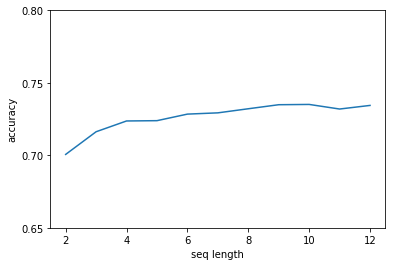

In [135]:
plt.figsize=(20,12)
plt.plot(seq_lengths_to_evaluate, np.array(means))
plt.yticks(np.arange(0.65, 0.8, step=0.05))
plt.xlabel("seq length")
plt.ylabel("accuracy")

In [17]:
saving_models = []
for s in seq_lengths_to_evaluate:
    cur_saving_dir = os.path.join(saved_model_dir, str(s))
    print(cur_saving_dir)
    saving_models.append(cur_saving_dir)
    if not os.path.exists(cur_saving_dir):
        os.makedirs(cur_saving_dir)

saved_model/corss_val/general_model/hp_seq_len/2
saved_model/corss_val/general_model/hp_seq_len/3
saved_model/corss_val/general_model/hp_seq_len/4
saved_model/corss_val/general_model/hp_seq_len/5
saved_model/corss_val/general_model/hp_seq_len/6
saved_model/corss_val/general_model/hp_seq_len/7
saved_model/corss_val/general_model/hp_seq_len/8
saved_model/corss_val/general_model/hp_seq_len/9
saved_model/corss_val/general_model/hp_seq_len/10
saved_model/corss_val/general_model/hp_seq_len/11
saved_model/corss_val/general_model/hp_seq_len/12


In [5]:
with open('pd_list_full_with_rewards_original_seq4.pkl', 'rb') as f:
    pd_list = pickle.load(f)

In [6]:
pd_list[0]

,user,choice,reward,time,payoff_structure,reward_1,reward_2,reward_3,reward_4,orig_choice_num,prev_choice,prev_reward
1,1,2,90,1076.0,2,90,90,46,18,1,1,84
2,1,3,53,612.0,2,80,84,53,28,2,2,90
3,1,4,24,742.0,2,87,81,50,24,3,3,53
4,1,2,92,927.0,2,86,92,61,28,4,4,24
5,1,2,78,966.0,2,75,78,55,30,5,2,92
6,1,1,71,637.0,2,71,78,50,34,6,2,78
7,1,1,75,644.0,2,75,83,58,43,7,1,71
8,1,2,80,640.0,2,77,80,52,30,8,1,75
9,1,2,80,1161.0,2,70,80,43,28,9,2,80
10,1,2,91,953.0,2,65,91,49,29,10,2,80


In [7]:

# TRAIN_NUM_STEPS = 4
# seq_length = 4

In [8]:
# use previous seq of 4's to be consistent  
with open('huge_pd_shuffled_with_rewards_original_seq4_SHUFFLED.pkl', 'rb') as f:
    huge_pd = pickle.load(f)

with open('cross_validation/diff_seq_lengths/all_huge_pd_shuffled_with_rewards_original_seq2_to_seq12_SHUFFLED_LIST.pkl', 'rb') as f:
    huge_pd_hp_list = pickle.load(f)

In [24]:
len(huge_pd.user.unique())

965

In [11]:
# load the kfolded pars
with open('cross_validation/payoff2_train_participants_5fold_list.pkl', 'rb') as f:
    payoff2_train_participants_5fold_list = pickle.load(f)

with open('cross_validation/payoff2_test_participants_5fold_list.pkl', 'rb') as f:
    payoff2_test_participants_5fold_list = pickle.load(f)

with open('cross_validation/payoff3_train_participants_5fold_list.pkl', 'rb') as f:
    payoff3_train_participants_5fold_list = pickle.load(f)

with open('cross_validation/payoff3_test_participants_5fold_list.pkl', 'rb') as f:
    payoff3_test_participants_5fold_list = pickle.load(f)

with open('cross_validation/payoff4_train_participants_5fold_list.pkl', 'rb') as f:
    payoff4_train_participants_5fold_list = pickle.load(f)
    
with open('cross_validation/payoff4_test_participants_5fold_list.pkl', 'rb') as f:
    payoff4_test_participants_5fold_list = pickle.load(f)

In [14]:
def my_kfold_split(huge_pd, kfold_train_payoff2, kfold_train_payoff3, kfold_train_payoff4, kfold_test_payoff2, kfold_test_payoff3, kfold_test_payoff4, k=5):
    """
    gets all the folding (trains and tests pars) and returns (train_data, test_data) in the same amount of folds (if theres 5 folds then 5 train_data etc)
    indices are corresponding ! ([0] in train comes with [0] in test)
    """
    train_data = []
    test_data = []
    for i in range(k):
        train_data.append(huge_pd[(huge_pd['user'].isin(kfold_train_payoff2[i]))|
                                (huge_pd['user'].isin(kfold_train_payoff3[i]))|
                                (huge_pd['user'].isin(kfold_train_payoff4[i]))].copy())
        
        test_data.append(huge_pd[(huge_pd['user'].isin(kfold_test_payoff2[i]))|
                                (huge_pd['user'].isin(kfold_test_payoff3[i]))|
                                (huge_pd['user'].isin(kfold_test_payoff4[i]))].copy())
    return train_data, test_data

In [11]:
cur_data = huge_pd.copy()
cur_data['choice'] = cur_data.choice.apply(lambda x: x - 1)
cur_data['prev_choice'] = cur_data.prev_choice.apply(lambda x: x - 1)

In [12]:
train_data, test_data = my_kfold_split(cur_data, 
                                       payoff2_train_participants_5fold_list,
                                       payoff3_train_participants_5fold_list,
                                       payoff4_train_participants_5fold_list,
                                       payoff2_test_participants_5fold_list,
                                       payoff3_test_participants_5fold_list,
                                       payoff4_test_participants_5fold_list,
                                       )
# sanity checks
assert(train_data[0].shape!=train_data[1].shape)
assert(train_data[0].shape!=train_data[2].shape)
assert(train_data[0].shape!=train_data[3].shape)
assert(train_data[0].shape!=train_data[4].shape)

assert(train_data[1].shape!=train_data[3].shape)
assert(train_data[1].shape!=train_data[4].shape)

assert(train_data[2].shape!=train_data[4].shape)

In [13]:
def get_train_test_data(train_data, test_data, seq_length):
    fold_X_train = []
    fold_y_train = []
    fold_X_test = []
    fold_y_test = []

    for train, test in zip(train_data, test_data):
        X = train.drop(columns=['index', 'choice', 'user', 'time', 'reward', 'payoff_structure', 'reward_1', 'reward_2', 'reward_3', 'reward_4'])
        X_prev = to_categorical(X.prev_choice, dtype='int64')
        y = train.choice
        num_of_classes = len(y.unique())
        y_train = to_categorical(y, dtype='int64')
        new_X = []
        for prev_choice, prev_reward in zip(X_prev, X.prev_reward):
            new_i = np.append(prev_choice, prev_reward)
            new_X.append(new_i)
        X_train = np.array(new_X)

        possible_samples_train = int(X_train.shape[0] / seq_length)
        possible_labels_train = int(y_train.shape[0] / seq_length)


        # reshape X to be [samples, time steps, features]
        X_train = np.reshape(X_train, (possible_samples_train, seq_length, X_train.shape[1]))
        fold_X_train.append(X_train)
        y_cat_train = np.reshape(y_train, (possible_samples_train, seq_length, y_train.shape[1]))
        fold_y_train.append(y_cat_train)

        ########################################################################
        ### TEST ###############################################

        X = test.drop(columns=['index', 'choice', 'user', 'time', 'reward', 'payoff_structure', 'reward_1', 'reward_2', 'reward_3', 'reward_4'])
        X_prev = to_categorical(X.prev_choice, dtype='int64')
        y = test.choice
        num_of_classes = len(y.unique())
        y_test = to_categorical(y, dtype='int64')
        new_X = []
        for prev_choice, prev_reward in zip(X_prev, X.prev_reward):
            new_i = np.append(prev_choice, prev_reward)
            new_X.append(new_i)
        X_test = np.array(new_X)

        possible_labels_test = int(y_test.shape[0] / seq_length)
        possible_samples_test = int(X_test.shape[0] / seq_length)

        X_test = np.reshape(X_test, (possible_samples_test, seq_length, X_test.shape[1]))
        fold_X_test.append(X_test)
        y_cat_test = np.reshape(y_test, (possible_labels_test, seq_length, y_test.shape[1]))
        fold_y_test.append(y_cat_test)

    
    return  fold_X_train, fold_y_train, fold_X_test, fold_y_test

In [9]:
class Model(object):
    def __init__(self,all_x,all_y, is_training, output_size, dropout=1.0, batch_size=TRAIN_BATCHES, return_seqence=False):

        # self.x = tf.placeholder(dtype=tf.int32, shape=[None, 4, 5], name='X_placeholder')
        # self.y = tf.placeholder(dtype=tf.int32, shape=[None, 4], name='Y_placeholder')

        # A dataset from a tensor
        dataset = tf.data.Dataset.from_tensor_slices(all_x)
        # Divide the dataset into batches. Once you reach the last batch which won't be 512, the dataset will know exactly which elements remain and should be passed as a batch.
        dataset = dataset.batch(TRAIN_BATCHES)
        # An iterator that can be reinitialized over and over again, therefore having a new shuffle of the data each time
        self.iterator = dataset.make_initializable_iterator()
        # A node that can be run to obtain the next element in the dataset. However, this node will be linked in the model so obtaining the next element will be done automatically
        self.data_X = self.iterator.get_next()

        labels = tf.data.Dataset.from_tensor_slices(all_y)
        # Shuffle the dataset with some arbitrary buffer size
        # dataset = dataset.shuffle(buffer_size=10)
        # Divide the dataset into batches. Once you reach the last batch which won't be 512, the dataset will know exactly which elements remain and should be passed as a batch.
        labels = labels.batch(TRAIN_BATCHES)
        # An iterator that can be reinitialized over and over again, therefore having a new shuffle of the data each time
        self.labels_iterator = labels.make_initializable_iterator()
        # A node that can be run to obtain the next element in the dataset. However, this node will be linked in the model so obtaining the next element will be done automatically
        self.data_Y = self.labels_iterator.get_next()



        self.seq_len = tf.placeholder(dtype=tf.int32,name='sequence_len')


        cell = tf.nn.rnn_cell.LSTMCell(HIDDEN_SIZE)
        self.current_batch_size = tf.shape(self.data_X)[0]
        init_state = cell.zero_state(self.current_batch_size, tf.float32)
        self.output, self.states = tf.nn.dynamic_rnn(cell=cell, inputs=tf.cast(self.data_X, tf.float32), initial_state=init_state)

        # tf.keras.layers.Dense(output_size, activation=tf.nn.softmax)

        # reshape to (batch_size * num_steps, HIDDEN_SIZE)
        output = tf.reshape(self.output, [-1, HIDDEN_SIZE])

        softmax_w = tf.Variable(tf.random_uniform([HIDDEN_SIZE, output_size]))
        softmax_b = tf.Variable(tf.random_uniform([output_size]))

        self.logits = tf.nn.xw_plus_b(output, softmax_w, softmax_b)
        # Reshape logits to be a 3-D tensor for sequence loss
        # if return_seqence:
        self.logits_reshaped = tf.reshape(self.logits, [self.current_batch_size, self.seq_len, output_size])[:,-1,:]

        # TODO: I need return_sequence false , which means I only needs the last output/hidden state
        self.softmax_out = tf.nn.softmax(self.logits)
        self.softmax_out_reshaped = tf.reshape(self.softmax_out, [self.current_batch_size,seq_length,output_size])[:,-1,:]

        loss = tf.keras.losses.categorical_crossentropy(tf.cast(self.data_Y,tf.float32), self.logits_reshaped,from_logits=True)


        self.cost = tf.reduce_sum(loss)

        # TODO: continue
        # get the prediction accuracy
        self.predict = tf.cast(tf.argmax(self.softmax_out, axis=1), tf.int64)
        self.predict_return_sequence_false = tf.cast(tf.argmax(self.softmax_out_reshaped, axis=1), tf.int64)

        # self.correct_prediction = tf.equal(tf.argmax(self.predict , 1), tf.argmax(self.data_Y, 1))
        self.correct_prediction = tf.equal(self.predict, tf.reshape(self.data_Y, [-1]))
        self.correct_prediction_return_sequence_false = tf.equal(self.predict_return_sequence_false, tf.argmax(self.data_Y, 1))

        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
        self.accuracy_return_sequence_false = tf.reduce_mean(tf.cast(self.correct_prediction_return_sequence_false, tf.float32))
        # tf.keras.metrics.categorical_accuracy(y_true,y_pred)

        if not is_training:
            return

        # self.optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        self.optimizer = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.9999).minimize(self.cost)


In [10]:
class SinglesModel(object):
    def __init__(self,is_training, output_size, dropout=1.0, batch_size=TRAIN_BATCHES, return_seqence=False, single_test=False):

        self.data_X = tf.placeholder(dtype=tf.int64, shape=[1, 4, 5], name='X_placeholder')
        self.data_Y = tf.placeholder(dtype=tf.int64, shape=[1, 4], name='Y_placeholder')
        
        self.seq_len = tf.placeholder(dtype=tf.int32,name='sequence_len')


        cell = tf.nn.rnn_cell.LSTMCell(HIDDEN_SIZE)
        self.current_batch_size = tf.shape(self.data_X)[0]
        init_state = cell.zero_state(self.current_batch_size, tf.float32)
        self.output, self.states = tf.nn.dynamic_rnn(cell=cell, inputs=tf.cast(self.data_X, tf.float32), initial_state=init_state)

        output = tf.reshape(self.output, [-1, HIDDEN_SIZE])

        softmax_w = tf.Variable(tf.random_uniform([HIDDEN_SIZE, output_size]))
        softmax_b = tf.Variable(tf.random_uniform([output_size]))

        self.logits = tf.nn.xw_plus_b(output, softmax_w, softmax_b)
        # Reshape logits to be a 3-D tensor for sequence loss
        # if return_seqence:
        self.logits_reshaped = tf.reshape(self.logits, [self.current_batch_size, self.seq_len, output_size])[:,-1,:]

        # TODO: I need return_sequence false , which means I only needs the last output/hidden state
        self.softmax_out = tf.nn.softmax(self.logits)
        self.softmax_out_reshaped = tf.reshape(self.softmax_out, [self.current_batch_size,seq_length,output_size])[:,-1,:]


        loss = tf.keras.losses.categorical_crossentropy(tf.cast(self.data_Y,tf.float32), self.logits_reshaped,from_logits=True)


        self.cost = tf.reduce_sum(loss)

        # TODO: continue
        # get the prediction accuracy
        self.predict = tf.cast(tf.argmax(self.softmax_out, axis=1), tf.int64)
        self.predict_return_sequence_false = tf.cast(tf.argmax(self.softmax_out_reshaped, axis=1), tf.int64)

        # self.correct_prediction = tf.equal(tf.argmax(self.predict , 1), tf.argmax(self.data_Y, 1))
        self.correct_prediction = tf.equal(self.predict, tf.reshape(self.data_Y, [-1]))
        self.correct_prediction_return_sequence_false = tf.equal(self.predict_return_sequence_false, tf.argmax(self.data_Y, 1))

        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
        self.accuracy_return_sequence_false = tf.reduce_mean(tf.cast(self.correct_prediction_return_sequence_false, tf.float32))
        # tf.keras.metrics.categorical_accuracy(y_true,y_pred)

        if not is_training:
            return
        # self.optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        self.optimizer = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.9999).minimize(self.cost)
    
    def test_single(self,all_x, all_y, model_path, output_size=4, print_iter=50, print_results=True):
        # setup data and models
    #     Model(all_x,all_y,is_training=False, output_size=4, batch_size=TRAIN_BATCHES, test_single=True)
#         m = model
        init_op = tf.global_variables_initializer()
        saver = tf.train.Saver()

        with tf.Session() as sess:
            sess.run([init_op])
            saver.restore(sess, model_path)
            counter = 0
            # print("will run for {} steps in total".format(len(all_x)))
            accs_over_batches = []
            loss_over_batches = []
            predictions_over_batches = []
            correct_predictions = []
            hidden_states = []
            logits_list = []
            softmaxes = []
            outputs = []
            output, states, \
            logits, logits_reshaped, softmax_out, softmax_out_reshaped,\
            predict, predict_return_sequence_false, correct_prediction, correct_prediction_return_sequence_false,\
            accuracy, accuracy_return_sequence_false,\
                cost = sess.run(
                [
                 self.output, self.states,
                 self.logits, self.logits_reshaped, self.softmax_out, self.softmax_out_reshaped,
                 self.predict, self.predict_return_sequence_false, self.correct_prediction, self.correct_prediction_return_sequence_false,
                 self.accuracy, self.accuracy_return_sequence_false,
                 self.cost],
                feed_dict={
                           self.seq_len: TRAIN_NUM_STEPS, self.data_X:all_x, self.data_Y:all_y
                           })
            # print()
            counter = counter + 1
            accs_over_batches.append(accuracy_return_sequence_false)
            loss_over_batches.append(cost)
            predictions_over_batches.append(predict_return_sequence_false)
            correct_predictions.append(correct_prediction_return_sequence_false)
            hidden_states.append(states)
            logits_list.append(logits_reshaped)
            softmaxes.append(softmax_out_reshaped)
            outputs.append(output)

            if print_results:
                print("---------------------------------------------------------------")
                # print(accs_over_batches[-1])
                print(np.mean(accs_over_batches))
                print("loss:")
                # print(loss_over_batches[-1])
                print(np.mean(loss_over_batches))
            # do a final save
            # saver.save(sess, save_path)

            return accs_over_batches, loss_over_batches, predictions_over_batches, correct_predictions, hidden_states, logits_list, softmaxes, outputs


In [11]:
def train(all_x, all_y, save_path, output_size=4, print_iter=50):
    # setup data and models
    m = Model(all_x,all_y,is_training=True, output_size=4, batch_size=TRAIN_BATCHES)
    init_op = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run([init_op])
        saver = tf.train.Saver()
        accs_over_epochs = []
        loss_over_epochs = []
        counter = 0
        # print("will run for {} steps in total".format(len(all_x)))
        for epoch in range(TRAIN_EPOCHS):
            accs_over_batches = []
            loss_over_batches = []
            sess.run([m.iterator.initializer, m.labels_iterator.initializer])
            try:
                # As long as there are elements execute the block below
                while True:
                    """
                    xs and ys are the current batches
                    output and states are the returned values of tf.nn.dynamic_rnn
                    """
                    xs,ys, \
                    output, states, \
                    logits, logits_reshaped, softmax_out, softmax_out_reshaped,\
                    predict, predict_return_sequence_false, correct_prediction, correct_prediction_return_sequence_false,\
                    accuracy, accuracy_return_sequence_false,\
                        cost, _= sess.run(
                        [m.data_X,m.data_Y,
                         m.output, m.states,
                         m.logits, m.logits_reshaped, m.softmax_out, m.softmax_out_reshaped,
                         m.predict, m.predict_return_sequence_false, m.correct_prediction, m.correct_prediction_return_sequence_false,
                         m.accuracy, m.accuracy_return_sequence_false,
                         m.cost,
                         m.optimizer],
                        feed_dict={
                                   m.seq_len: TRAIN_NUM_STEPS
                                   })
                    # print()
                    counter = counter +1
                    accs_over_batches.append(accuracy_return_sequence_false)
                    loss_over_batches.append(cost)
            except tf.errors.OutOfRangeError:
                print("finished epoc {}, acc {} loss {}".format(epoch, np.mean(accs_over_batches),np.mean(loss_over_batches)))
                accs_over_epochs.append(np.mean(accs_over_batches))
                loss_over_epochs.append(np.mean(loss_over_batches))
                print(accs_over_batches)
                pass
        print("---------------------------------------------------------------")
        print(accs_over_epochs[-1])
        print(np.mean(accs_over_epochs))
        print("loss:")
        print(loss_over_epochs[-1])
        print(np.mean(loss_over_epochs))
        # do a final save
        saver.save(sess, save_path)

        return accs_over_epochs, loss_over_epochs

In [12]:
def test(all_x, all_y, model_path, output_size=4, print_iter=50, print_results=True):
    # setup data and models
    m = Model(all_x,all_y,is_training=False, output_size=4, batch_size=TRAIN_BATCHES)
    init_op = tf.global_variables_initializer()
    saver = tf.train.Saver()

    with tf.Session() as sess:
        sess.run([init_op])
        saver.restore(sess, model_path)
        counter = 0
        # print("will run for {} steps in total".format(len(all_x)))
        accs_over_batches = []
        loss_over_batches = []
        predictions_over_batches = []
        correct_predictions = []
        hidden_states = []
        logits_list = []
        softmaxes = []
        outputs = []
        sess.run([m.iterator.initializer, m.labels_iterator.initializer])
        try:
            # As long as there are elements execute the block below
            while True:
                """
                xs and ys are the current batches
                output and states are the returned values of tf.nn.dynamic_rnn
                """
                xs,ys, \
                output, states, \
                logits, logits_reshaped, softmax_out, softmax_out_reshaped,\
                predict, predict_return_sequence_false, correct_prediction, correct_prediction_return_sequence_false,\
                accuracy, accuracy_return_sequence_false,\
                    cost = sess.run(
                    [m.data_X,m.data_Y,
                     m.output, m.states,
                     m.logits, m.logits_reshaped, m.softmax_out, m.softmax_out_reshaped,
                     m.predict, m.predict_return_sequence_false, m.correct_prediction, m.correct_prediction_return_sequence_false,
                     m.accuracy, m.accuracy_return_sequence_false,
                     m.cost],
                    feed_dict={
                               m.seq_len: TRAIN_NUM_STEPS
                               })
                # print()
                counter = counter + 1
                accs_over_batches.append(accuracy_return_sequence_false)
                loss_over_batches.append(cost)
                predictions_over_batches.append(predict_return_sequence_false)
                correct_predictions.append(correct_prediction_return_sequence_false)
                hidden_states.append(states)
                logits_list.append(logits_reshaped)
                softmaxes.append(softmax_out_reshaped)
                outputs.append(output)
        except tf.errors.OutOfRangeError:
            if print_results:
                print("finished testing, acc {} loss {}".format(np.mean(accs_over_batches),np.mean(loss_over_batches)))
                print(accs_over_batches)
            pass
        if print_results:
            print("---------------------------------------------------------------")
            # print(accs_over_batches[-1])
            print(np.mean(accs_over_batches))
            print("loss:")
            # print(loss_over_batches[-1])
            print(np.mean(loss_over_batches))
        # do a final save
        # saver.save(sess, save_path)

        return accs_over_batches, loss_over_batches, predictions_over_batches, correct_predictions, hidden_states, logits_list, softmaxes, outputs


# Get the activations and predictions per person    
 - Need to load each fold model, use it for the testing, save and evantually average across all folds
<a id="testing_per_participant"></a>


In [26]:
seq_length = 4
with open('pd_list_full_with_rewards_original_seq4.pkl', 'rb') as f:
    pd_list = pickle.load(f)

### For each person , make a prediction at time t and get the Results data scrutre, states & output

In [27]:
def get_last_seq(person_df, choice_number, seq_len, debug_prints=False):
    """
    Gets a person's data and a choice number and returns a sequence of previous 4 (or seq_length) choices made (maybe not 4 (seq_length) consecutives)
    """
    if choice_number < seq_len:
        if debug_prints: print("must be {} and more to get a sequence".format(seq_len))
        return -2
    ind = np.where(person_df["orig_choice_num"] == choice_number)
    if len(ind[0]) == 0:
        if debug_prints: print("choice number {} not found".format(choice_number))
        return -9
    elif len(ind[0]) > 1:
        if debug_prints: print("FOR SOME REASON THERE'S MORE THAN ONE CHOICE NUMBER LIKE {}".format(choice_number))
        return -1
    # got here so I found the choice number , now lets check if we have 4 previous choices
    seq = []
    for i in range(ind[0][0] - seq_len + 1, ind[0][0] + 1, 1):
        seq.append(i)

    return person_df.iloc[seq]

In [28]:
def create_data_sequence(seq_df, seq_len):
    """
    gets a SINGLE sequence in df form and returns it in a train/test ready form (numpy) X and y
    """
    cur_data = seq_df.copy()
    cur_data['choice'] = cur_data.choice.apply(lambda x: x - 1)
    cur_data['prev_choice'] = cur_data.prev_choice.apply(lambda x: x - 1)
    X = cur_data.drop(
        columns=['choice', 'user', 'time', 'reward', 'payoff_structure', 'reward_1', 'reward_2', 'reward_3', 'reward_4',
                 'orig_choice_num'])
    X_prev = to_categorical(X.prev_choice, num_classes=4, dtype='int64')
    y = cur_data.choice
    num_of_classes = len(y.unique())
    y = to_categorical(y, num_classes=4, dtype='int64')

    new_X = []
    for prev_choice, prev_reward in zip(X_prev, X.prev_reward):
        new_i = np.append(prev_choice, prev_reward)
        new_X.append(new_i)
    new_X = np.array(new_X)

    # reshape X to be [samples, time steps, features]
    X_reshaped = np.reshape(new_X, (1, seq_length, new_X.shape[1]))
    y_reshaped = np.reshape(y, (1, seq_length, y.shape[1]))

    return X_reshaped, y_reshaped

In [29]:
tf.reset_default_graph()

In [30]:
"""
I go over pd_list , which is the full list of dfs for each person (WITHOUT NAs). For each time t , I get the previous 4 steps and if there is no choice at time t I place -1. 
If there is a choice, I do predict for time t using previous 4
"""
import logging
logging.getLogger("tensorflow").setLevel(logging.WARNING)
def test_per_par(set_of_pars, fold_number, save_path):
    """
    run the extraction of pred/acc/activation etc.
    gets the participants (actual numbers) that are in a certain fold. (folder number will be just for printing)

    """
    tf.reset_default_graph()
    total_actual_predictions = 0
    total_predicted_correct = 0
    persons_predictions_expr = []
    persons_true_false_predictions = []
    persons_activations = []
    curr_time = dt.datetime.now()
    person_count = 1
    for person in pd_list:
        if person.user.unique()[0] in set_of_pars:
            cur_person_activations = []
            predictions_expr = []
            predicted_correct = 0
            actual_predictions = 0
            true_false_predictions = np.zeros(150)
            for i in range(0, 150):
                tf.reset_default_graph()
                m = get_last_seq(person, i, seq_len=seq_length)
                if not isinstance(m,pd.DataFrame):
                    if m == -9:
                        predictions_expr.append(-1)
                        true_false_predictions[i] = -1
                        cur_person_activations.append(-1)
                        continue
                    elif m == -2:
                        predictions_expr.append(-1)
                        true_false_predictions[i] = -1
                        cur_person_activations.append(-1)
                        continue
                    elif m == -1:
                        true_false_predictions[i] = -1
                        cur_person_activations.append(-1)
                        continue
                X_expr,y_expr = create_data_sequence(m,seq_len=seq_length)
                x = X_expr[:,:,:].copy()
                y = y_expr[:,-1,:].copy()
                model1 = SinglesModel(is_training=False, output_size=4, batch_size=TRAIN_BATCHES, single_test=True)

                current_acc, current_loss, class_pred, correct_prediction, hidden_states, logits_test, softmax_test, outputs_test = model1.test_single(x, y, save_path, print_results=False)
                # notice that h[0] is correct where theres only one cell's hidden state, if I want the 4-5 steps, I will need to get just h 
                # FIXED : now adding outputs_test - which is 4 hidden states, last one is the same as hidden_states[0].h[0]
                cur_person_activations.append(outputs_test)
                predictions_expr.append(class_pred[0][0])
                actual_predictions += 1
                if correct_prediction[0][0]:
                    predicted_correct += 1
                    # True for a correct prediction, False otherwise
                    true_false_predictions[i] = correct_prediction[0][0]

            persons_activations.append(cur_person_activations)
            persons_true_false_predictions.append(true_false_predictions)
            persons_predictions_expr.append(predictions_expr)
            total_actual_predictions += actual_predictions
            total_predicted_correct += predicted_correct
            seconds = (float((dt.datetime.now() - curr_time).seconds))
            curr_time = dt.datetime.now()
            print("finished person {} from fold #{} in {} seconds".format(person_count, fold_number, seconds))
            person_count+=1
    
    results = persons_true_false_predictions,persons_predictions_expr,total_actual_predictions,total_predicted_correct, persons_activations
    return results

In [31]:
cur_save_dir

'saved_model/corss_val/general_model/fold4/'

In [32]:
# from tensorflow.python.client import device_lib

# def get_available_gpus():
#     local_device_protos = device_lib.list_local_devices()
#     return [x.name for x in local_device_protos]

# get_available_gpus()
# with tf.device('/gpu:{}'.format(i)):

In [33]:
# flatten folds and run test
folded_tests_sets = []
folded_results = []
counter = 0
for path, cur_save_dir, test_2, test_3, test_4 in zip(saving_paths, saving_dirs, payoff2_test_participants_5fold_list, payoff3_test_participants_5fold_list, payoff4_test_participants_5fold_list):
    fold_set = [*test_2 , *test_3 , *test_4]
    folded_tests_sets.append(fold_set)
    results = test_per_par(fold_set, counter, save_path=path)
    folded_results.append(results)
    counter+=1
    with open(os.path.join(cur_save_dir, 'general_model_participants_test_results.pkl'), 'wb') as handle:
        pickle.dump(results, handle)

finished person 1 from fold #0 in 35.0 seconds
finished person 2 from fold #0 in 37.0 seconds
finished person 3 from fold #0 in 38.0 seconds
finished person 4 from fold #0 in 37.0 seconds
finished person 5 from fold #0 in 38.0 seconds
finished person 6 from fold #0 in 39.0 seconds
finished person 7 from fold #0 in 37.0 seconds
finished person 8 from fold #0 in 35.0 seconds
finished person 9 from fold #0 in 36.0 seconds
finished person 10 from fold #0 in 36.0 seconds
finished person 11 from fold #0 in 36.0 seconds
finished person 12 from fold #0 in 36.0 seconds
finished person 13 from fold #0 in 36.0 seconds
finished person 14 from fold #0 in 35.0 seconds
finished person 15 from fold #0 in 34.0 seconds
finished person 16 from fold #0 in 35.0 seconds
finished person 17 from fold #0 in 35.0 seconds
finished person 18 from fold #0 in 36.0 seconds
finished person 19 from fold #0 in 34.0 seconds
finished person 20 from fold #0 in 35.0 seconds
finished person 21 from fold #0 in 35.0 seconds
f

finished person 171 from fold #0 in 35.0 seconds
finished person 172 from fold #0 in 35.0 seconds
finished person 173 from fold #0 in 35.0 seconds
finished person 174 from fold #0 in 35.0 seconds
finished person 175 from fold #0 in 36.0 seconds
finished person 176 from fold #0 in 34.0 seconds
finished person 177 from fold #0 in 36.0 seconds
finished person 178 from fold #0 in 36.0 seconds
finished person 179 from fold #0 in 35.0 seconds
finished person 180 from fold #0 in 35.0 seconds
finished person 181 from fold #0 in 36.0 seconds
finished person 182 from fold #0 in 34.0 seconds
finished person 183 from fold #0 in 36.0 seconds
finished person 184 from fold #0 in 36.0 seconds
finished person 185 from fold #0 in 34.0 seconds
finished person 186 from fold #0 in 35.0 seconds
finished person 187 from fold #0 in 34.0 seconds
finished person 188 from fold #0 in 34.0 seconds
finished person 189 from fold #0 in 35.0 seconds
finished person 190 from fold #0 in 35.0 seconds
finished person 191 

finished person 147 from fold #1 in 36.0 seconds
finished person 148 from fold #1 in 36.0 seconds
finished person 149 from fold #1 in 36.0 seconds
finished person 150 from fold #1 in 36.0 seconds
finished person 151 from fold #1 in 36.0 seconds
finished person 152 from fold #1 in 36.0 seconds
finished person 153 from fold #1 in 36.0 seconds
finished person 154 from fold #1 in 37.0 seconds
finished person 155 from fold #1 in 36.0 seconds
finished person 156 from fold #1 in 38.0 seconds
finished person 157 from fold #1 in 35.0 seconds
finished person 158 from fold #1 in 36.0 seconds
finished person 159 from fold #1 in 36.0 seconds
finished person 160 from fold #1 in 35.0 seconds
finished person 161 from fold #1 in 36.0 seconds
finished person 162 from fold #1 in 36.0 seconds
finished person 163 from fold #1 in 36.0 seconds
finished person 164 from fold #1 in 36.0 seconds
finished person 165 from fold #1 in 36.0 seconds
finished person 166 from fold #1 in 36.0 seconds
finished person 167 

finished person 123 from fold #2 in 36.0 seconds
finished person 124 from fold #2 in 37.0 seconds
finished person 125 from fold #2 in 36.0 seconds
finished person 126 from fold #2 in 36.0 seconds
finished person 127 from fold #2 in 37.0 seconds
finished person 128 from fold #2 in 36.0 seconds
finished person 129 from fold #2 in 35.0 seconds
finished person 130 from fold #2 in 36.0 seconds
finished person 131 from fold #2 in 36.0 seconds
finished person 132 from fold #2 in 36.0 seconds
finished person 133 from fold #2 in 36.0 seconds
finished person 134 from fold #2 in 36.0 seconds
finished person 135 from fold #2 in 36.0 seconds
finished person 136 from fold #2 in 36.0 seconds
finished person 137 from fold #2 in 36.0 seconds
finished person 138 from fold #2 in 36.0 seconds
finished person 139 from fold #2 in 36.0 seconds
finished person 140 from fold #2 in 36.0 seconds
finished person 141 from fold #2 in 36.0 seconds
finished person 142 from fold #2 in 37.0 seconds
finished person 143 

finished person 100 from fold #3 in 35.0 seconds
finished person 101 from fold #3 in 34.0 seconds
finished person 102 from fold #3 in 36.0 seconds
finished person 103 from fold #3 in 37.0 seconds
finished person 104 from fold #3 in 33.0 seconds
finished person 105 from fold #3 in 36.0 seconds
finished person 106 from fold #3 in 35.0 seconds
finished person 107 from fold #3 in 36.0 seconds
finished person 108 from fold #3 in 35.0 seconds
finished person 109 from fold #3 in 23.0 seconds
finished person 110 from fold #3 in 35.0 seconds
finished person 111 from fold #3 in 36.0 seconds
finished person 112 from fold #3 in 36.0 seconds
finished person 113 from fold #3 in 36.0 seconds
finished person 114 from fold #3 in 36.0 seconds
finished person 115 from fold #3 in 36.0 seconds
finished person 116 from fold #3 in 37.0 seconds
finished person 117 from fold #3 in 36.0 seconds
finished person 118 from fold #3 in 36.0 seconds
finished person 119 from fold #3 in 37.0 seconds
finished person 120 

finished person 76 from fold #4 in 37.0 seconds
finished person 77 from fold #4 in 63.0 seconds
finished person 78 from fold #4 in 61.0 seconds
finished person 79 from fold #4 in 52.0 seconds
finished person 80 from fold #4 in 34.0 seconds
finished person 81 from fold #4 in 35.0 seconds
finished person 82 from fold #4 in 35.0 seconds
finished person 83 from fold #4 in 36.0 seconds
finished person 84 from fold #4 in 36.0 seconds
finished person 85 from fold #4 in 36.0 seconds
finished person 86 from fold #4 in 33.0 seconds
finished person 87 from fold #4 in 33.0 seconds
finished person 88 from fold #4 in 36.0 seconds
finished person 89 from fold #4 in 37.0 seconds
finished person 90 from fold #4 in 35.0 seconds
finished person 91 from fold #4 in 36.0 seconds
finished person 92 from fold #4 in 37.0 seconds
finished person 93 from fold #4 in 37.0 seconds
finished person 94 from fold #4 in 36.0 seconds
finished person 95 from fold #4 in 37.0 seconds
finished person 96 from fold #4 in 36.0 

In [34]:
cur_save_dir

'saved_model/corss_val/general_model/fold4/'

In [ ]:
## optional for when there's a need in last hidden state only
# act_array = np.asarray(persons_activations)
# last_hidden_states_per_person_per_time = []
# for per in act_array:
#     per_last_states = []
#     for j in range(len(per)):
#         if isinstance(per[j],int):
#             per_last_states.append(-1)
#         else:
#             per_last_states.append(per[j][0][0][-1])
#     last_hidden_states_per_person_per_time.append(per_last_states)

In [ ]:
# results = persons_true_false_predictions,persons_predictions_expr,total_actual_predictions,total_predicted_correct, persons_activations

In [35]:
saving_dir

'cross_validation/general_model/'

In [36]:
saved_model_dir

'saved_model/corss_val/general_model/'

In [38]:
with open(os.path.join(saving_dir, 'general_model_results_5folds.pkl'), 'wb') as f:
    pickle.dump(folded_results, f)

# # old version : just the last state
# with open(os.path.join(saving_dir, 'activations_tf_no_reward.pkl'), 'wb') as f:
#     pickle.dump(last_hidden_states_per_person_per_time, f)

    
# with open(os.path.join(saving_dir, 'activations_FULL_tf_no_reward.pkl'), 'wb') as f:
#     pickle.dump(persons_activations, f)

In [39]:
len(results)

5